In [1]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [2]:
!git config --global user.email "shrinivasmore51@gmail.com"
!git config --global user.name "Shinu87"

In [3]:
!git clone https://github.com/Shinu87/Minor-Project---3rd-Year.git

Cloning into 'Minor-Project---3rd-Year'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 3.41 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

 422219
 4222191.ipynb
'422219 (1).ipynb'
'422219 (2).ipynb'
'422219 (3).ipynb'
'422219 (4).ipynb'
'422219 (5).ipynb'
'422219 (6).ipynb'
 422219.ipynb
 AI.ipynb
'A*.ipynb'
 ALLCODES.ipynb
 AMAON.ipynb
'BFS DFS.ipynb'
'chatbot(Langchain).ipynb'
'Copy of 422219 (1).ipynb'
'Copy of 422219.ipynb'
'Copy of AI.ipynb'
'Copy of housepredictionusinglinearregression.ipynb'
'Copy of Image_captioning'
'Copy of Image Captioning with Vision Transformer.ipynb'
 Game.ipynb
'graphical method'
 graph_image_captioning.ipynb
 housepredictionusingbayesian.ipynb
 housepredictionusinglinearregression.ipynb
'image_captioning_transformers (1).ipynb'
 image_captioning_transformers.ipynb
'Image Captioning Using Attention Based.ipynb'
'Image Captioning using CNN and RNN .ipynb'
'Image Captioning Using Graphical Method.ipynb'
'Image Captioning using LSTM + Attention.ipynb'
'Image Captioning using Reinforcement Learning.ipynb'
'Image Captioning Using Scene Graph.ipynb'
'Image Captioning With End to End Transformers

In [5]:
!mv "/content/drive/MyDrive/Colab Notebooks/Image Captioning with Vision Transformer.ipynb" /content/Minor-Project---3rd-Year/


In [6]:
!git checkout -b pretrainedmodel

fatal: not a git repository (or any of the parent directories): .git


In [7]:
!git branch


fatal: not a git repository (or any of the parent directories): .git


In [8]:
%cd /content/Minor-Project---3rd-Year
!git add .
!git commit -m "Added image captioning project"
!git push origin main


/content/Minor-Project---3rd-Year
[main a963e00] Added image captioning project
 1 file changed, 1 insertion(+)
 create mode 100644 Image Captioning with Vision Transformer.ipynb
fatal: could not read Username for 'https://github.com': No such device or address


In [9]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt
import requests
from nltk.translate.bleu_score import sentence_bleu
import numpy as np

In [10]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [11]:
def load_image(image_path):
    return Image.open(image_path).convert("RGB")

In [12]:
def generate_caption(image):
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        output = model.generate(**inputs, max_length=50, num_beams=5)
    return processor.batch_decode(output, skip_special_tokens=True)[0]

In [13]:
def display_image(image, caption):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"\n✨ Caption: {caption} ✨", fontsize=14, fontweight='bold', color='blue')
    plt.show()

In [14]:
def show_image_parts(image, caption):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    width, height = image.size
    crops = [
        image.crop((0, 0, width//2, height//2)),
        image.crop((width//2, 0, width, height//2)),
        image.crop((0, height//2, width//2, height)),
    ]
    for ax, crop, idx in zip(axes, crops, range(1, 4)):
        ax.imshow(crop)
        ax.axis("off")
        ax.set_title(f"Part {idx} Caption: {caption[:20]}...", fontsize=10, color='red')
    plt.tight_layout()
    plt.show()

In [15]:
def compute_bleu(reference_caption, generated_caption):
    reference = [reference_caption.split()]
    candidate = generated_caption.split()
    return sentence_bleu(reference, candidate)

In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
def compute_meteor(reference_captions, generated_caption):
    return meteor_score([ref.split() for ref in reference_captions], generated_caption.split())

image_url = "https://example.com/sample.jpg"
image_path = "/content/test2.jpg"
response = requests.get(image_url, stream=True)
if response.status_code == 200:
    with open(image_path, 'wb') as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)

reference_captions = [
    "Two men are playing musical instruments in a room.",
    "A guitarist and another person are in a dimly lit room.",
    "Two musicians are engaged in a performance with guitars.",
    "A person is tuning a guitar while another plays in a studio.",
    "Two men are in a music room with guitars and drums around."
]

image = load_image(image_path)
generated_caption = generate_caption(image)
meteor = compute_meteor(reference_captions, generated_caption)

print("Generated Caption:", generated_caption)
print("📊 METEOR Score:", meteor)

Generated Caption: two men are playing guitars in a room
📊 METEOR Score: 0.66167290886392


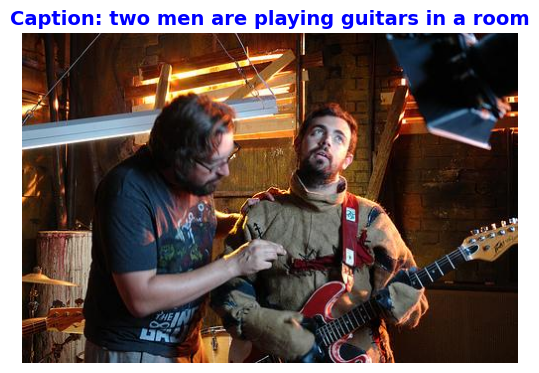

In [27]:
image_path = "/content/test2.jpg"
image = load_image(image_path)
# Display the image with generated caption
plt.imshow(image)
plt.axis("off")
plt.title("Caption: two men are playing guitars in a room", fontsize=14, fontweight="bold", color="blue")
plt.show()